#### Final outcome: We have to build a multiple linear regression model for the prediction of demand for<br> shared bikes.<br>


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a<br>
short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock"<br>
which is usually computer-controlled wherein the user enters the payment information, and the system<br>
unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to<br>
the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market<br>
scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue<br>
as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared<br>
bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes<br>
in the American market. The company wants to know:<br>

 - Which variables are significant in predicting the demand for shared bikes.<br>
 - How well those variables describe the bike demands<br>
 
#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used<br>
by the management to understand how exactly the demands vary with different features. They can accordingly manipulate<br>
the business strategy to meet the demand levels and meet the customer's expectations.

The model should be built taking this 'cnt' as the target variable.

In [1]:
#Lets import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import r2_score

#### Steps which we will follow for this exercise:
    -  Reading, understanding the data
    -  Data Cleaning
    -  Visualizing the data
    -  Preparing the data for modelling (train-test split, preprocessing step such as rescaling etc.)
    -  Training the model - learn the cofficient and intercept
    -  Residual Analysis
    -  Predictions and evaluation on the test set

#### Step1: Reading, understanding the data

In [2]:
#Reading the data

bike_share = pd.read_csv('day.csv')
bike_share.head()

#As per the given inputs - The model should be built taking this 'cnt' as the target variable.

#The 'cnt' variable indicates the total number of bike rentals, including both casual and registered. It
#is a continuous variable.

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Lets check shape(rows, columns) of the dataframe into which the data is read

bike_share.shape

(730, 16)

In [4]:
#Lets check if there are any missing values

bike_share.info()

#From the below output, it seems that there is no missing value.

#Other than 'dteday', almost all the predictor variables are of int/float types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Lets get a get statistical summary of all the numerical variables of the dataframe
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Step2: Data Cleaning

In [6]:
#lets check the presence of duplicates in the datafreame

bike_share.drop_duplicates(inplace=True)
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike_share.shape
#There was no duplicated rows present as the shape of the dataframe is not changed after running
#drop_duplicates function.

(730, 16)

In [8]:
#Lets identify the columns which are not useful for the analysis, and hence we are
#not proceeding with them any further, i.e. we will drop these columns.

    #1. instant - This column is just for record index. Hence, not useful for the analysis.
    #2. dteday - we have year and month columns available with us.
    #3. casual, registered - Since 'cnt' variable includes both casual and registered, i am going\
                             #drop these columns also.
    
#So, lets drop these two columns from the dataframe.

bike_share = bike_share.drop(['instant','dteday','casual','registered'],axis=1)
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bike_share.shape
#shape has been changed after deleting the four columns

(730, 12)

In [10]:
#Lets transform/convert 'season'columns to categorical column
#so that we can create dummy variable from it.

bike_share['season']  = bike_share['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})

In [11]:
#Lets transform/convert mnth to the categorical column
bike_share['mnth']  = bike_share['mnth'].map({1:'Jan',2:'Feb', 3:'March', 4:'Apr',5:'May',6:'Jun',7:'July',
                                              8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [12]:
#Lets transform/convert 'season'columns to the categorical column
#Lets transform/convert weathersit 
bike_share['weathersit']  = bike_share['weathersit'].map({1:'Clear and Cloud',2:'Mist and Cloud', 3:'Light rain',
                                                          4:'Heavy rain'})


In [13]:
#Lets transform/convert weekday to the categorical column
bike_share['weekday']  = bike_share['weekday'].map({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed',
                                                   4:'Thu',5:'Fri',6:'Sat'})

In [14]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist and Cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist and Cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear and Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear and Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear and Cloud,9.305237,11.46350,43.6957,12.522300,1600


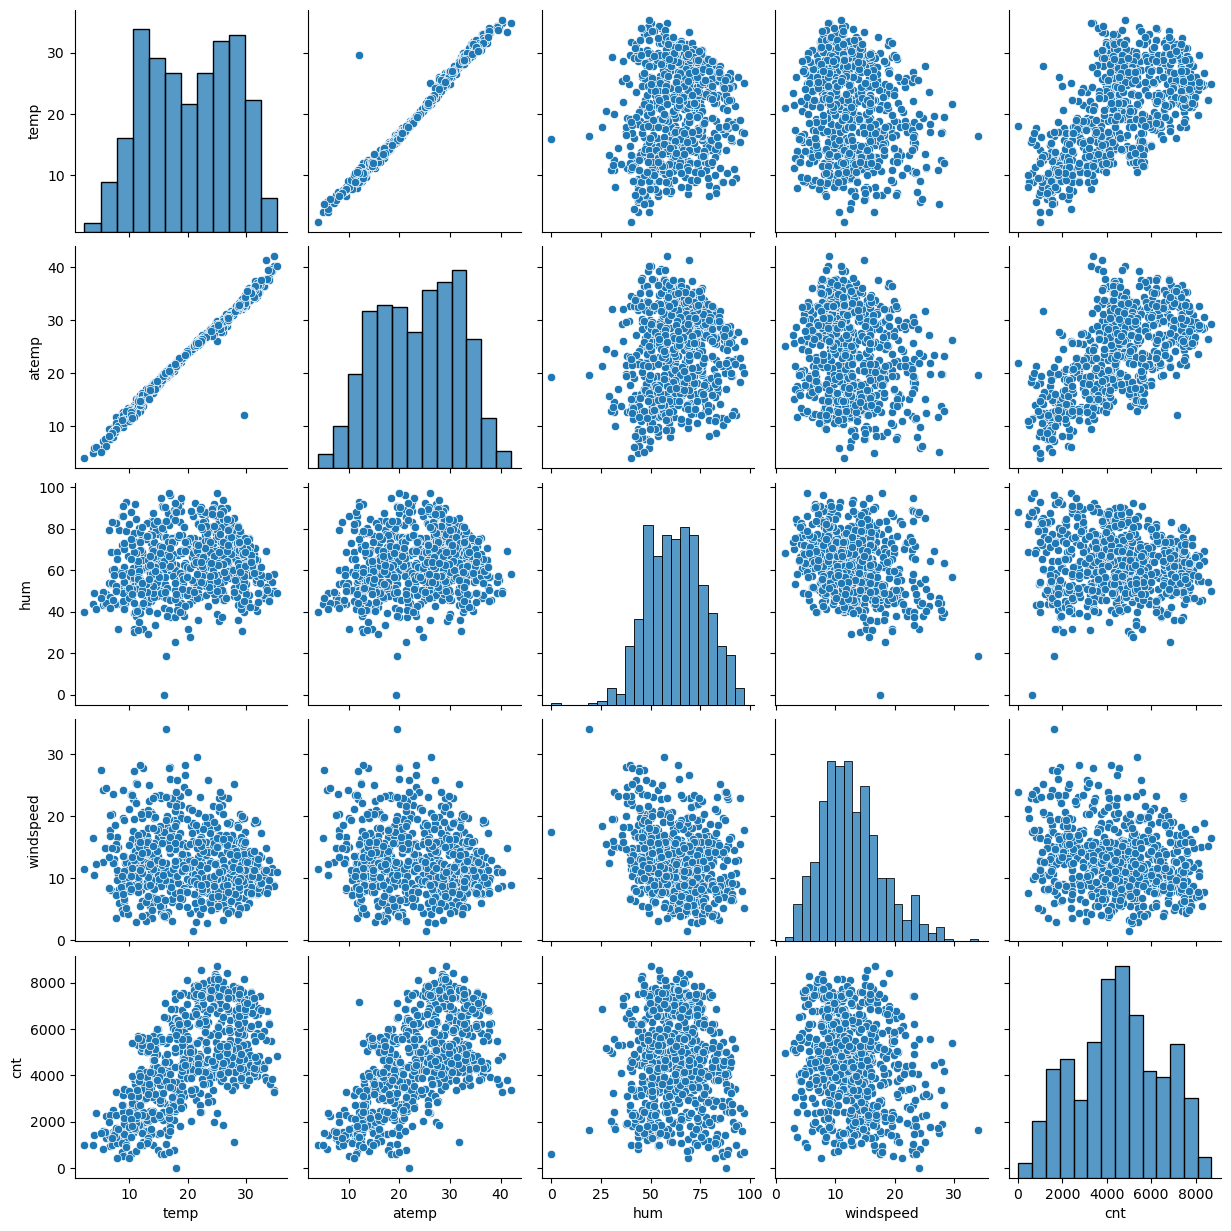

In [15]:
#visualizing the numerical variables

sns.pairplot(bike_share,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()


#On the diagonal, we can see the histograms. These are the distributions of the individual variables
#themselves. On the off-diagnonal, we can see the pair-wise scatter plots.

#temp,atemp are strong predictors of price.

#The conclusion we will draw from the above plots is yes, we should consider a linear regression
#model because there are atleast some independent variables which look positively correlated with
#cnt. But the below plots are only for numerical variables. Now, we also have to visualize the
#categorical variables.

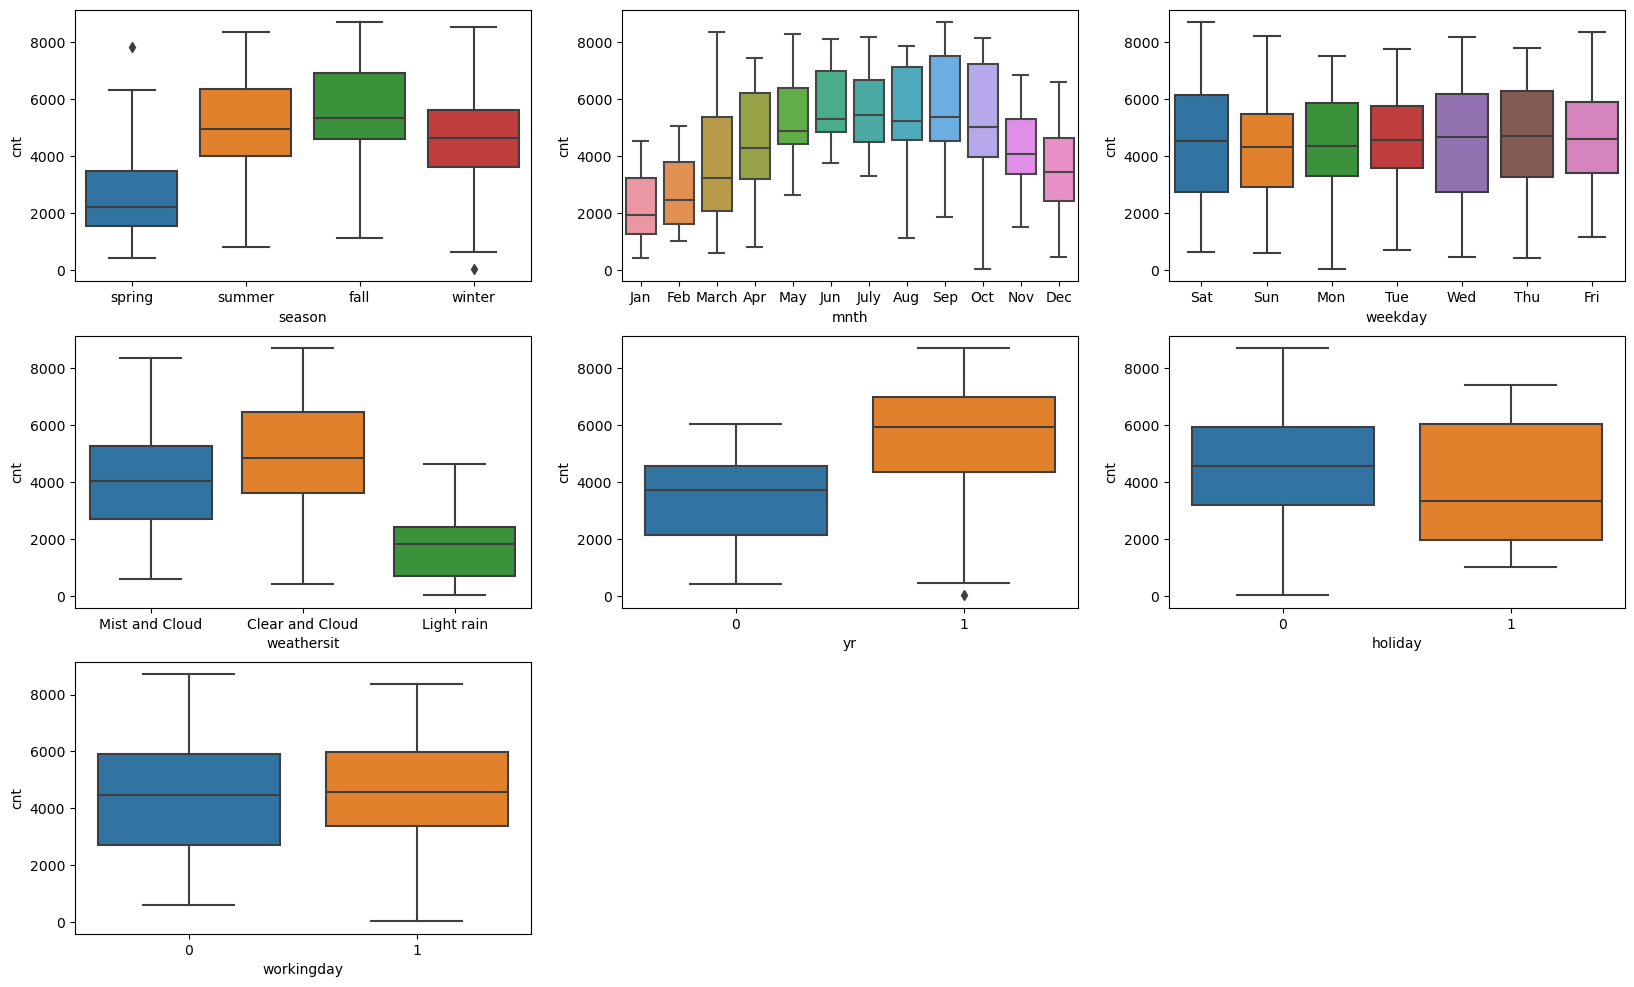

In [16]:
#Creating subplots to Visualize the categorical variables.

#because we want many boxplots within a certain area of the screen, we can 
#create subplots.

plt.figure(figsize=(20, 12))

plt.subplot(3,3,1) #i want 3 rows, 3 coulmns, and this is the first subplot.
sns.boxplot(x = 'season', y = 'cnt', data = bike_share)

plt.subplot(3,3,2) 
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share)

plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share)

plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share)

plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_share)

plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share)

plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share)

plt.show()

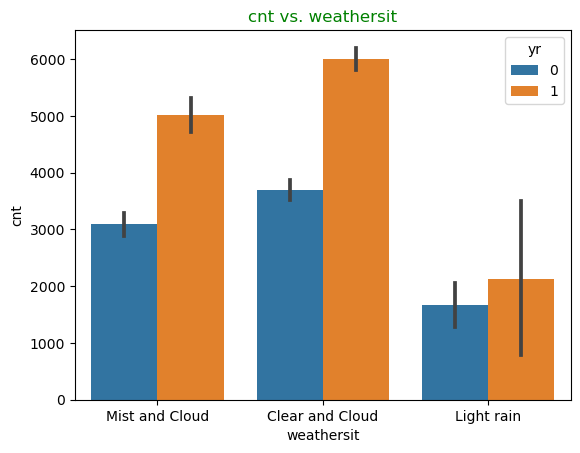

In [17]:
#'Lets see rthe relationship between the weather, cnt and year.
plt.title("cnt vs. weathersit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=bike_share,x='weathersit', y='cnt',hue='yr')
plt.show()

****Below the are insights from the below plots:****

1. Fall season has more booking followed by summer season.
2. Most of the bookings are in the months from June to September.
3. During weekdays, most of the booking are on thursday, friday and saturday.
4. year (0: 2018, 1:2019) - Clear weather leads to an increased number of bookings. In 2019, the booking number
   as compared to the number in 2018.
5. Year 2019 had more mooking than 2018.
6. On holiday, the number of bookings are less.
7. There is not too much difference on the number of bookings if its a working day or not. However, working day 
   slightly have the large number of booking.  


In [18]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist and Cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist and Cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear and Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear and Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear and Cloud,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
#Creating dummy variables for season,mnth,weekday and weathersit

#As we can see that all the variables are numeric instead of season,mnth,weekday and weathersit.
#lets convert 'season' into numeric also.

#One way to do this is to create dummy variables. In 'season', there are four categorical
#levels, so, corresponding to that we will create new columns using 0's and 1's.

#Pandas has a builtin method called get_dummies.

season_dm = pd.get_dummies(bike_share['season'])
season_dm.head()

#As we can see below, initially, 'season' was a single column. Now,get_dummies has created
#four columns.

#So, this is a new representation of a single column using four binary variables or boolean variables.

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. We can drop the `fall` column, as the type<br> of fall can be identified with just the last three columns where:
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `suummer`
- `001` will correspond to `winter`

The reason we are trying to delete a column is because of efficiency. If the<br> same information
can be repesented by the other three variables, then why use four variables.

In [20]:
#So, we can modified last code statement to delete a dummy redundant variable

season_dm = pd.get_dummies(bike_share['season'],drop_first=True)
season_dm.head()

#The drop_first parameter specifies whether or not we want to drop the first
#category of the categorical variable we’re encoding.

#By default, this is set to drop_first = False. This will cause get_dummies to
#create one dummy variable for every level of the input categorical variable.

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
#Lets create dummy variables for mnth,weekday and weathersit

mnth_dm = pd.get_dummies(bike_share['mnth'],drop_first=True)
weekday_dm = pd.get_dummies(bike_share['weekday'],drop_first=True)
weathersit_dm = pd.get_dummies(bike_share['weathersit'],drop_first=True)

In [22]:
#So, we have created the dummy variables. But, the dummy variables are stored in a
#separate dataframes.

#So, we need to join thess dataframes with the original dataframe. The way to do this
#is to concat the dummy dataframes with the original dataframe.

bike_share = pd.concat([bike_share,season_dm,mnth_dm,weekday_dm,weathersit_dm],axis=1)
bike_share.head()

#As we can see below, we have created the dummy variables. However, we can drop the
#'season', mnth, weekday and weathersit as they are thecategorial variable. We cant feed
#them into the model.

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain,Mist and Cloud
0,spring,0,Jan,0,Sat,0,Mist and Cloud,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist and Cloud,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear and Cloud,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear and Cloud,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear and Cloud,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [23]:
bike_share = bike_share.drop(['season', 'mnth', 'weekday', 'weathersit'],axis=1)
bike_share.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain,Mist and Cloud
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
#Lets get the datafrrame info now
bike_share.info()

#NO categorical column left now, good to proceed forward.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  July            730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  March           730 non-null    uin

In [25]:
#Lets check the dimensions of the dataframe
bike_share.shape

(730, 30)

### test-train split and scale the features

Before model building, you first need to perform the test-train split and scale
the features.

Scaling of variables is an important step because, as the variable ‘cnt’ is on a different
scale with respect<br> to all other numerical variables, which take very small values. Also,
the categorical variables that you encoded earlier take either<br> 0 or 1 as their values.
Hence, it is important to have everything on the same scale for the model to be easily
interpretable.

### Splitting into train and test

In [26]:
#For splitting into train and test sets, we have imported sklearn.
#and from sklearn.model_selection, we have imported train_test_split

#So, we can use 'train_test_split' to split the dataset into train and test sets.

#In 'train_test_split', we just give the name of the dataframe

df_train,df_test = train_test_split(bike_share,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

#It will give two datafreames df_train and df_test

(510, 30)
(220, 30)


In [27]:
#When building a model, we have to interpret the cofficients. It is extremely 
#important that all these variables are at a comparable scale so that the cofficients
#are also comparable. So, this is the idea of rescaling. Thats one advantage
#of rescaling is interpretability.

#Other advantage of rescaling is that if we scale the variable between (0,1) 
#or sort of that range than some variables are in 1000, some are in 10s, the
#optimization which happens behind the scene become faster.

#Here, i am going to use the Min-Max scaling (Normalization) for rescaling because
#it takes care of outliers. So, if there is an outlier in the original data points,
#they should have been mapped to 1 and other data points should have been between 
#0 and 1.
   
#Min-Max scaling (Normalization) compresses all the data between 0 and 1.
#The max value of the data is 1 anad min value is 0.

#Sklearn comes with a module called preprocessing which has built-in
#class min-max scaler.

In [28]:
#create an object/instantiate an object

scaler = MinMaxScaler()
#syntax - instantiate using (), dont put anything inside the bracket

In [29]:
bike_share.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain,Mist and Cloud
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
#We dont want to scale all the variables. We want to scale only numeric variable
#As an example, there are binary variables. Meaning of 0 and 1 in binary variables
#is very clear, 1 means Yes, 0 means No. We can scale binary variables, there is
#strictly technically wrong with that. If we will scale binary variables, there
#will be interpretability issues.

#So, first, we need to create a list of only numeric variables.

num_vars = ['temp','atemp','hum','windspeed','cnt']

#Now, we will subset the training dataset.

#Paradigm of sklearn

#There are 3 methods that come with most of the classes/implementations.

#fit(): when we use fit() on the training set, it will learn/compute xmax, xmin

#After the fit method, if we call transform() method.

#transform() - computes x-xmin/xmax-xmin

#fit leans what has to be done and transform does that.

#fit_transform() -  a single method that can be used to perform the above two tasks.

#We will take training dataset and we will subset the training dataset to
#only include numeric variables, and on this subset of data we will apply
#scaler function as per the below:

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain,Mist and Cloud
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#As we can see above, the binary variables are still 0's and 1's. ALl the numerical variables
#are mapped to a scale between 0 and 1.

#We can infact verify if it is indeed between 0 and 1. We can look at all the numerical
#variables and se describe function.

df_train[num_vars].describe()

#We can see below that the max values of all the variables are 1, and the min values are 0.
#So, min-max scaler have worked correctly.

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#We have rescaled all thr variables which we wanted to rescale. Now,
#we can proceed to modeling.

#Now that we have prepared the data and are done with the test-train split, let’s
#prepare a heat map and take a look at the correlations between the variables.

### Training the model - learn the cofficient and intercept

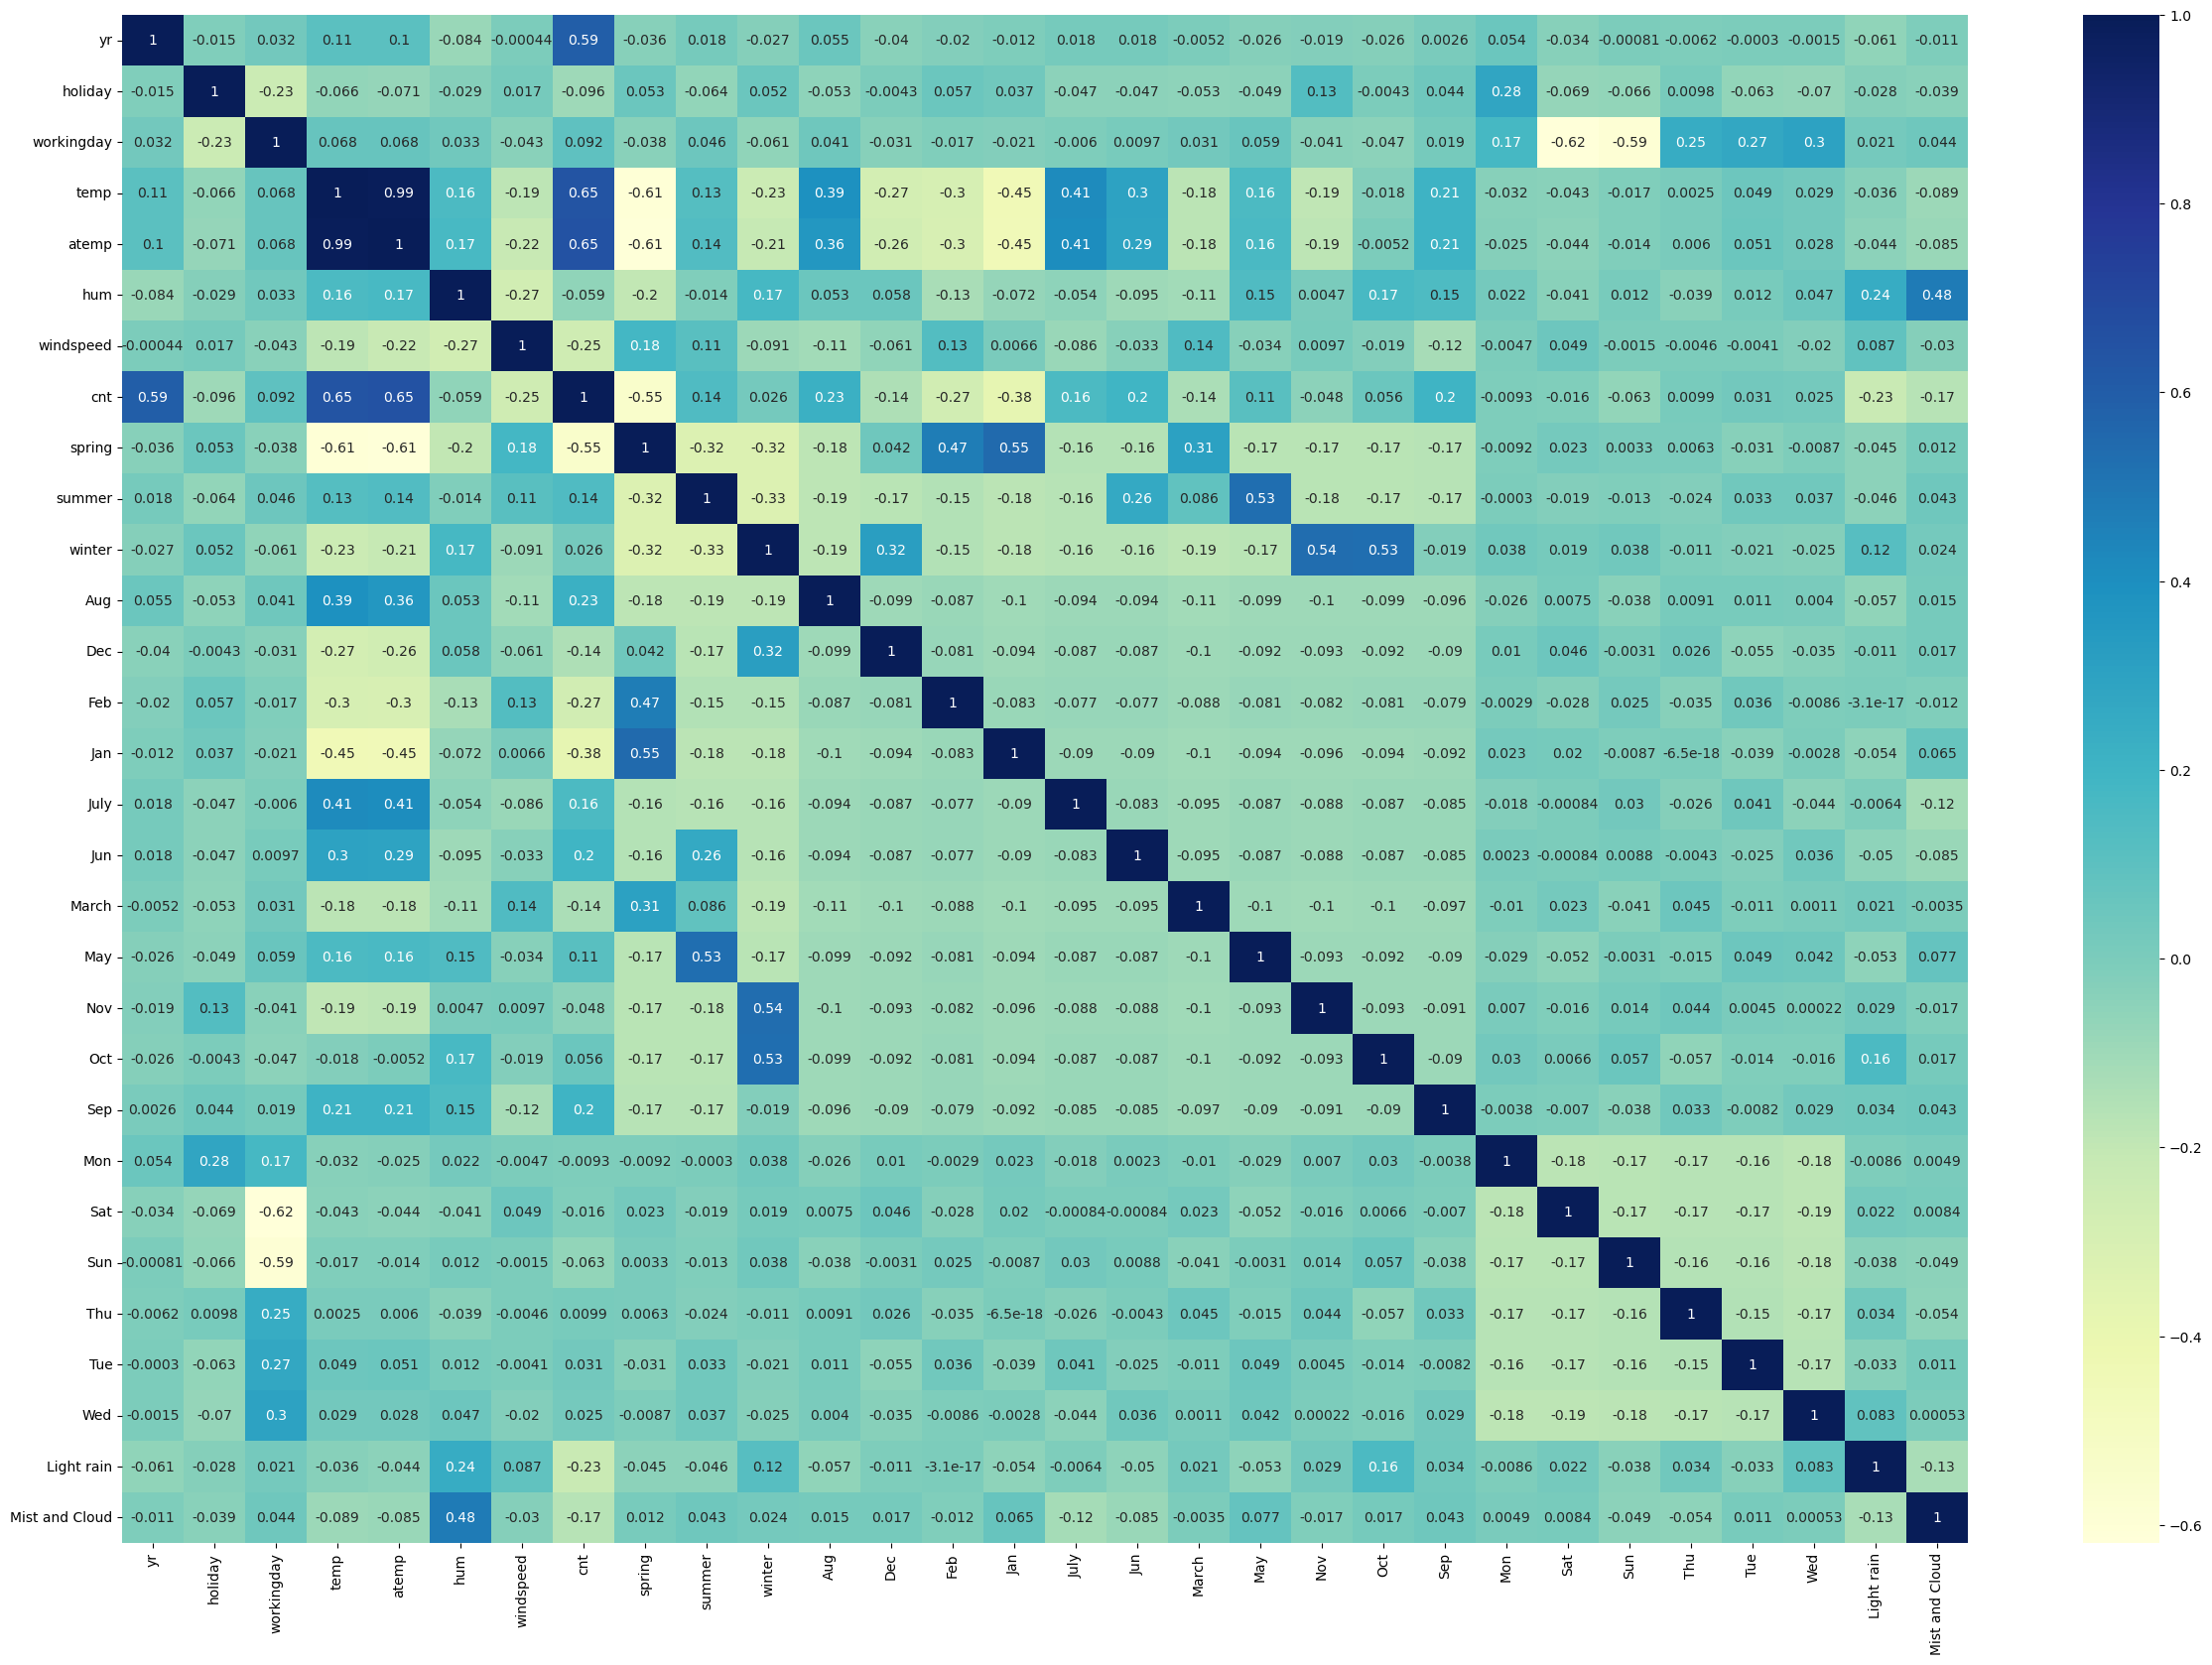

In [33]:
## Before, we start with the training process, lets draw a heap map

#we have the training dataset, df_train and we want to plot the correlation between all the
#variables.

# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()
            
#cmap="YlGnBu" is an argument used to specify the color map for the heatmap.

#So, we want to see the correlation of all the variables with price.

#temp,atemp and yr have strong correlation with cnt.

There are multiple ways of arriving at the final model:

    1. We statrt with all the variables and we keep on removing the variables which we
       think are insignificant. So, we start with 30 variables and step by step, based
       on some criteria, we remove one variable at a time, and finally we end up with
       lets say 6 or 7. 
    
    2. In the second way, we statrt with a single variable. We build a linear regression
       model with just one variable. We add other variable to the model and see whether
       the model improves. Usually, it will improve because the two variables will have 
       more information than one. Usually, it will improve, if the second variable is
       useful. So, we keep the second variable, add the 3rd variable, 4th one and we stop
       at a point where we think adding more variables does not improve the model 
       significantly.        
By improving the model, we mean a metric like R2  or root mean square error.

So, we will start with the first appraoch.

In [34]:
#Lets first create X and y.

#For training, we need X_train and y_train which we are going to create from df_train.

y_train = df_train.pop('cnt')#extract column cnt from df_train
#It will remove the column cnt inplace and assign to y_train

X_train = df_train #Whatever else left is the X_train

### Adding all variables to the Model

In [35]:
#Using Recursive feature elimination (RFE) for automated variable selection

#Running RFE with output number of variables equal to 15

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)  #running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
#Lets get the list of top 15 selected  variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 15),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 11),
 ('Feb', False, 14),
 ('Jan', True, 1),
 ('July', False, 8),
 ('Jun', False, 4),
 ('March', False, 5),
 ('May', False, 3),
 ('Nov', False, 10),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light rain', True, 1),
 ('Mist and Cloud', True, 1)]

In [37]:
#Lets move RFE supported columns to the variable col

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Jan', 'Sep', 'Sat', 'Sun', 'Light rain',
       'Mist and Cloud'],
      dtype='object')

In [38]:
#Lets get the columns which are not selected
X_train.columns[~rfe.support_]

Index(['atemp', 'spring', 'Dec', 'Feb', 'July', 'Jun', 'March', 'May', 'Nov',
       'Oct', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Model Building using statsmodels

In [39]:
#Lets cretae a datsaset with the above selecetd 15 columns (RFE columns)

X_train_rfe = X_train[col]

In [40]:
#lets see all the columns in X_train_rfe

X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Jan', 'Sep', 'Sat', 'Sun', 'Light rain',
       'Mist and Cloud'],
      dtype='object')

In [41]:
#Build model with all the selected columns

#Now, we can proceed with building the model.

#First, we need to import the 'statsmodels.api' library. We can also use 
#Sklearn. We are going to use statsmodels here because we want to look
#p-vales, significance level etc.

#So, the first step is to add the #constant because statsmodels api doesnt
#add an intercept by default. So,

X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm)

#sm.OLS(y_train, X_train_sm) doesnt actually do anything. We havent learn the cofficients yet. We have just
#created an object of OLS class, an instance of OLS class. So, lr is a linear regression object. We will
#store the results such as the cofficients and all the other details in lr_model.

#Lets fit the model
lr_model = lr.fit()

lr_model.summary()
#Sklrean doesnt provide detailed summary results of the regression model like the below which
#statsmodel provides.

#Any P-value less than .05 is low and above .05 is high.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          1.01e-191
Time:                        21:48:30   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1727      0.023      7.601      0.000       0.128       0.217
yr                 0.2299      0.008     28.744      0.000       0.214       0.246
holiday           -0.0233      0.021     -1.123      0.262      -0.064       0.017
workingday         0.0768      0.009      8.650      0.000       0.059       0.094
temp               0.5156      0.024     21.197      0.000       0.468       0.563
hum               -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed         -0.1879      0.025     -7.411      0.000      -0.238      -0.138
summer             0.0967      0.011      8.705      0.000       0.075       0.119
winter             0.1375      0.011     11.978      0.000       0.115       0.160
Aug                0.0504      0.016      3.133      0.002       0.019       0.082
Jan               -0.0374      0.017     -2.164      0.031      -0.071      -0.003
Sep                0.1170      0.016      7.317      0.000       0.086       0.148
Sat                0.0858      0.011      7.789      0.000       0.064       0.107
Sun                0.0334      0.012      2.878      0.004       0.011       0.056
Light rain        -0.2449      0.026     -9.423      0.000      -0.296      -0.194
Mist and Cloud    -0.0565      0.010     -5.455      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                     1.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
#Now, question is what is the way in which we will arrive to a final model.

#The algorithm will be something like the below:
    #1. First, we will look at the significance (p-values) of the variables. Based on the p-vales
       #we can drop some variables. We have the variables and the way to arrive at the final model 
       #will be to drop one variable at a time.
    
       #One Questions may be that on what basis we drop the variable.
       
       #So, one information which we look at is p-value 
       #Other nformation is which we can look is VIF which tells how colinear a variable is with all
       #the other variables. 

#So, based on p-value and VIF, we will decide which variable to drop.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated<br> with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

The higher a variable is related to all the other variables, the higher the VIF of that variable.

The common heuristic we follow for the VIF values is:<br>

    > 10:  Definitely high VIF value and the variable should be eliminated.
    > 5:  Can be okay, but it is worth inspecting.
    < 5: Good VIF value. No need to eliminate this variable.

In [43]:
#Compute VIF

#We will use variance_inflation_factor method to compute VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame() #creates an empty DataFrame and assigns it to the variable vif
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#VIF is storing VIF's of all the variables in X_train_rfe.

#So, there might be asituation that a variable is significant but it has high VIF i.e. it is correlated
#with every other variable.

#We will have the VIF of <5

,Features,VIF
2,workingday,34.00
11,Sat,8.38
12,Sun,8.20
1,holiday,2.24
3,temp,1.94
4,hum,1.88
7,winter,1.58
14,Mist and Cloud,1.56
9,Jan,1.55
6,summer,1.48


### Create another model

In [44]:
#holiday column has p-value of 0.262 which is greater than .05, while its VIF is within the range 2.24.
#hence, dropping this columns

X_train_rfe = X_train_rfe.drop(['holiday'],axis=1)
X_train_rfe.shape

(510, 14)

In [45]:
#Build model using updated columns
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm) #create model
lr_model = lr.fit() #fit model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          1.01e-191
Time:                        21:48:31   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1493      0.037      4.049      0.000       0.077       0.222
yr                 0.2299      0.008     28.744      0.000       0.214       0.246
workingday         0.1002      0.025      3.954      0.000       0.050       0.150
temp               0.5156      0.024     21.197      0.000       0.468       0.563
hum               -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed         -0.1879      0.025     -7.411      0.000      -0.238      -0.138
summer             0.0967      0.011      8.705      0.000       0.075       0.119
winter             0.1375      0.011     11.978      0.000       0.115       0.160
Aug                0.0504      0.016      3.133      0.002       0.019       0.082
Jan               -0.0374      0.017     -2.164      0.031      -0.071      -0.003
Sep                0.1170      0.016      7.317      0.000       0.086       0.148
Sat                0.1091      0.027      4.077      0.000       0.057       0.162
Sun                0.0567      0.027      2.108      0.036       0.004       0.110
Light rain        -0.2449      0.026     -9.423      0.000      -0.296      -0.194
Mist and Cloud    -0.0565      0.010     -5.455      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Compute VIF

#Because we have to look at VIF along with the p-values, lets calculate VIF

vif = pd.DataFrame() #creates an empty DataFrame and assigns it to the variable vif
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.03
1,workingday,16.02
2,temp,12.26
4,windspeed,4.35
10,Sat,4.35
11,Sun,4.25
13,Mist and Cloud,2.22
0,yr,2.07
6,winter,2.06
5,summer,1.97


### Create another model

In [47]:
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)
X_train_rfe.shape

(510, 13)

In [48]:
#Build model using updated columns
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm) #create model
lr_model = lr.fit() #fit model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          6.55e-189
Time:                        21:48:31   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0600      0.031      1.929      0.054      -0.001       0.121
yr                 0.2336      0.008     28.879      0.000       0.218       0.250
workingday         0.1014      0.026      3.933      0.000       0.051       0.152
temp               0.4920      0.024     20.393      0.000       0.445       0.539
windspeed         -0.1583      0.025     -6.372      0.000      -0.207      -0.110
summer             0.0931      0.011      8.256      0.000       0.071       0.115
winter             0.1270      0.011     11.121      0.000       0.105       0.149
Aug                0.0487      0.016      2.980      0.003       0.017       0.081
Jan               -0.0431      0.018     -2.458      0.014      -0.078      -0.009
Sep                0.1109      0.016      6.843      0.000       0.079       0.143
Sat                0.1123      0.027      4.122      0.000       0.059       0.166
Sun                0.0549      0.027      2.004      0.046       0.001       0.109
Light rain        -0.2889      0.024    -11.871      0.000      -0.337      -0.241
Mist and Cloud    -0.0820      0.009     -9.475      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       62.535   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.370
Skew:                          -0.654   Prob(JB):                     2.71e-32
Kurtosis:                       5.265   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Compute VIF

#Because we have to look at VIF along with the p-values, lets calculate VIF

vif = pd.DataFrame() #creates an empty DataFrame and assigns it to the variable vif
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,10.87
2,temp,9.88
3,windspeed,4.35
9,Sat,3.25
10,Sun,3.04
0,yr,2.06
4,summer,1.94
5,winter,1.80
6,Aug,1.60
12,Mist and Cloud,1.60


### Creating another model

In [50]:
# Sun has p-value of 0.046 while VIF is 3.04. Lets drop Sun variable.

X_train_rfe = X_train_rfe.drop(['Sun'],axis=1)
X_train_rfe.shape

(510, 12)

In [51]:
#Build model using updated columns
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm) #create model
lr_model = lr.fit() #fit model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.18e-189
Time:                        21:48:32   Log-Likelihood:                 506.84
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     497   BIC:                            -932.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1061      0.021      5.042      0.000       0.065       0.147
yr                 0.2338      0.008     28.811      0.000       0.218       0.250
workingday         0.0547      0.011      4.958      0.000       0.033       0.076
temp               0.4936      0.024     20.408      0.000       0.446       0.541
windspeed         -0.1594      0.025     -6.395      0.000      -0.208      -0.110
summer             0.0936      0.011      8.283      0.000       0.071       0.116
winter             0.1265      0.011     11.053      0.000       0.104       0.149
Aug                0.0490      0.016      2.985      0.003       0.017       0.081
Jan               -0.0437      0.018     -2.485      0.013      -0.078      -0.009
Sep                0.1090      0.016      6.717      0.000       0.077       0.141
Sat                0.0656      0.014      4.622      0.000       0.038       0.094
Light rain        -0.2877      0.024    -11.790      0.000      -0.336      -0.240
Mist and Cloud    -0.0816      0.009     -9.396      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       67.618   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.037
Skew:                          -0.690   Prob(JB):                     2.40e-36
Kurtosis:                       5.412   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Compute VIF

#Because we have to look at VIF along with the p-values, lets calculate VIF

vif = pd.DataFrame() #creates an empty DataFrame and assigns it to the variable vif
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.32
1,workingday,4.29
3,windspeed,3.61
0,yr,2.05
4,summer,1.91
9,Sat,1.75
5,winter,1.60
6,Aug,1.60
11,Mist and Cloud,1.57
8,Sep,1.31


### Creating another model

In [53]:
#Jan has a p-value of 0.013, lets drop this variable.

X_train_rfe = X_train_rfe.drop(['Jan'],axis=1)
X_train_rfe.shape

(510, 11)

In [54]:
#Build model using updated columns
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm) #create model
lr_model = lr.fit() #fit model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          4.31e-189
Time:                        21:48:32   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0809      0.019      4.365      0.000       0.045       0.117
yr                 0.2328      0.008     28.578      0.000       0.217       0.249
workingday         0.0546      0.011      4.926      0.000       0.033       0.076
temp               0.5208      0.022     24.022      0.000       0.478       0.563
windspeed         -0.1518      0.025     -6.105      0.000      -0.201      -0.103
summer             0.1010      0.011      9.220      0.000       0.080       0.123
winter             0.1379      0.011     13.083      0.000       0.117       0.159
Aug                0.0512      0.016      3.111      0.002       0.019       0.084
Sep                0.1117      0.016      6.864      0.000       0.080       0.144
Sat                0.0653      0.014      4.576      0.000       0.037       0.093
Light rain        -0.2860      0.025    -11.664      0.000      -0.334      -0.238
Mist and Cloud    -0.0826      0.009     -9.474      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Compute VIF

#Because we have to look at VIF along with the p-values, lets calculate VIF

vif = pd.DataFrame() #creates an empty DataFrame and assigns it to the variable vif
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,summer,1.82
8,Sat,1.69
6,Aug,1.58
10,Mist and Cloud,1.54
5,winter,1.51
7,Sep,1.30


### Creating another model

In [56]:
#Drop Aug variable

X_train_rfe = X_train_rfe.drop(['Aug'],axis=1)
X_train_rfe.shape

(510, 10)

In [57]:
#Build model using updated columns
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm) #create model
lr_model = lr.fit() #fit model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.13e-188
Time:                        21:48:32   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.031      0.000       0.038       0.112
yr                 0.2331      0.008     28.370      0.000       0.217       0.249
workingday         0.0561      0.011      5.024      0.000       0.034       0.078
temp               0.5499      0.020     27.861      0.000       0.511       0.589
windspeed         -0.1552      0.025     -6.195      0.000      -0.204      -0.106
summer             0.0886      0.010      8.608      0.000       0.068       0.109
winter             0.1307      0.010     12.600      0.000       0.110       0.151
Sep                0.0974      0.016      6.184      0.000       0.066       0.128
Sat                0.0675      0.014      4.693      0.000       0.039       0.096
Light rain        -0.2871      0.025    -11.611      0.000      -0.336      -0.239
Mist and Cloud    -0.0800      0.009     -9.143      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Compute VIF

#Because we have to look at VIF along with the p-values, lets calculate VIF

vif = pd.DataFrame() #creates an empty DataFrame and assigns it to the variable vif
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#All variables are now significant. ALso, the VIF values are below 5. So, this is the decent model
#which we have.

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,Sat,1.69
4,summer,1.57
9,Mist and Cloud,1.53
5,winter,1.40
6,Sep,1.20
8,Light rain,1.08


### Residual analysis on the train data

In [59]:
#error/residual = f(actual_y_train, y_train_pred)

#So, first we need to compute predicted values of y_train

#Our final trained model is stored in lr_model. So, first we will compute the predicted values.

y_train_pred = lr_model.predict(X_train_sm)

#y_train_pred is the predicted y values of the training set

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_3420\2006856300.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: title={'center': 'Distribution of the error terms'}, ylabel='Density'>

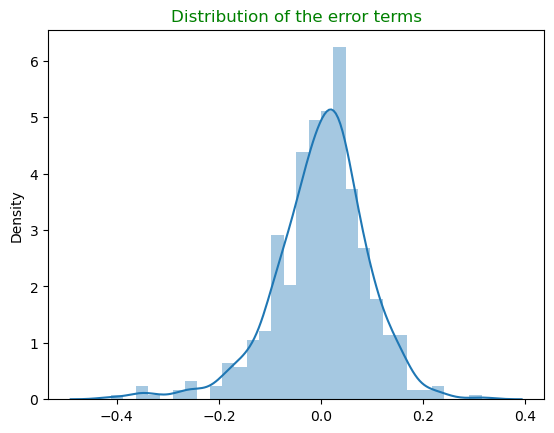

In [60]:
#We are interested in looking at the distribution of the error/residual terms. These errors/residuals are
#normally distributed. 

#Lets plot the histogram of the error terms and see what it looks like.

plt.title("Distribution of the error terms", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
res= y_train - y_train_pred
sns.distplot(res)

#As we can see in the above plot, the distribution is centered around 0. It is approximately normal.

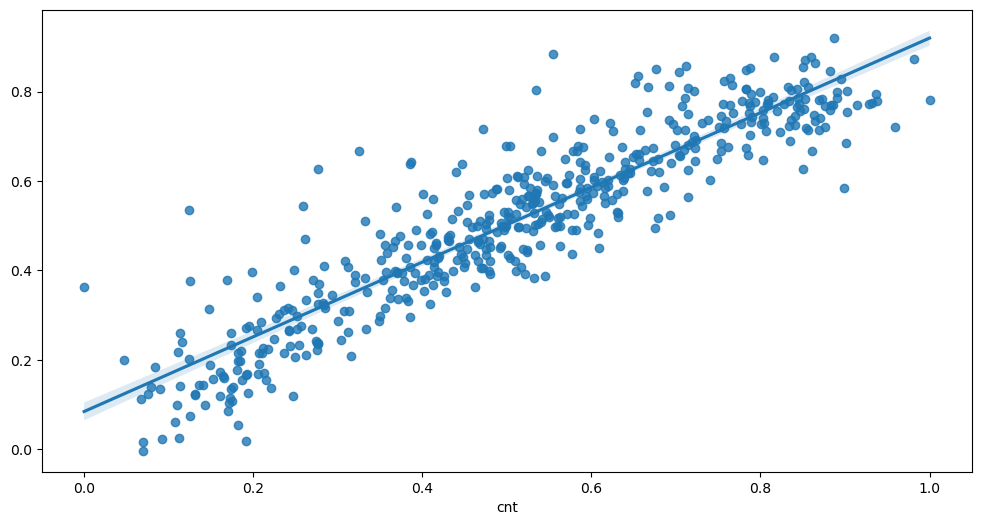

In [71]:
#lets check if the error Terms have approximatly a Constant Variance.

plt.figure(figsize = (12,6))
sns.regplot(x=y_train, y=y_train_pred)
plt.show()

### Predictions and evaluations on the test set

In [61]:
#Now, we will make predictions on the test set. ALso, we will evaluate the model on the test set.

#In our final model, we identified that the R-Square on the training set was 83.5%..

#While making predictions on the test set, we will look on what will be the R-Square on the test set.
#and these R-Square's should be comparable.

#So, we have the test set and first thing #that we have to do is to apply the same transformation on the test set
#that we have applied on the training set.

#Before starting modeling on training set, we resacled the features in the training set. So, the cofficients learned
#by the model were corresponding to the scaled features.

#Transformation on the test set using learning from the training set

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head() #to get starting lines of the test data set

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain,Mist and Cloud
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [62]:
#Lets check if all the variables are scaled appropriately.
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain,Mist and Cloud
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
y_test = df_test.pop('cnt')#extract column cnt from df_test
#It will remove the column cnt inplace and assign to y_test

X_test = df_test #Whatever else left is the X_test

In [64]:
X_test_sm = X_test[X_train_rfe.columns] #dropping variables which were not considered during traning the model

X_test_sm = sm.add_constant(X_test_sm) ##Add a constant to the test set X_test_sm

X_test_sm.head()

,const,yr,workingday,temp,windspeed,summer,winter,Sep,Sat,Light rain,Mist and Cloud
184,1.0,0,0,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0


In [65]:
#Using trained model to make predictions for the test data.

y_test_pred = lr_model.predict(X_test_sm)

In [66]:
#Lets evaluate the model i.e. compute R_square

#For this, first we have to import r2_score from sklearn.metrics library.

r2_score(y_true=y_test, y_pred=y_test_pred)

0.7961390438459766

In [67]:
#R_Square on the test set is: 79.6
    
#R_Square on the training set was: 83.5 

Text(0.5, 0.98, 'y_test vs. y_test_pred')

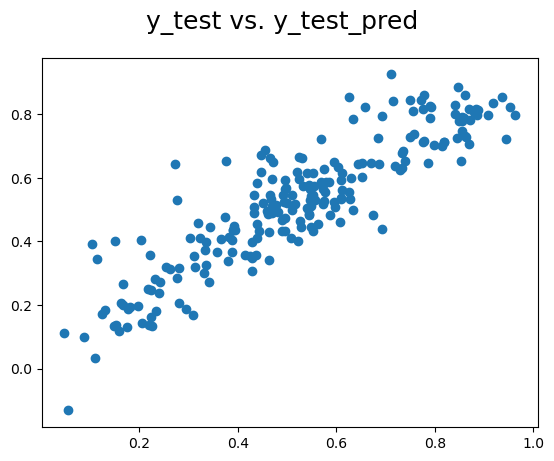

In [68]:
#Plotting y_test_pred, y_test to see the spread

fig = plt.figure()

plt.scatter(y_test,y_test_pred)

fig.suptitle('y_test vs. y_test_pred',fontsize=18)

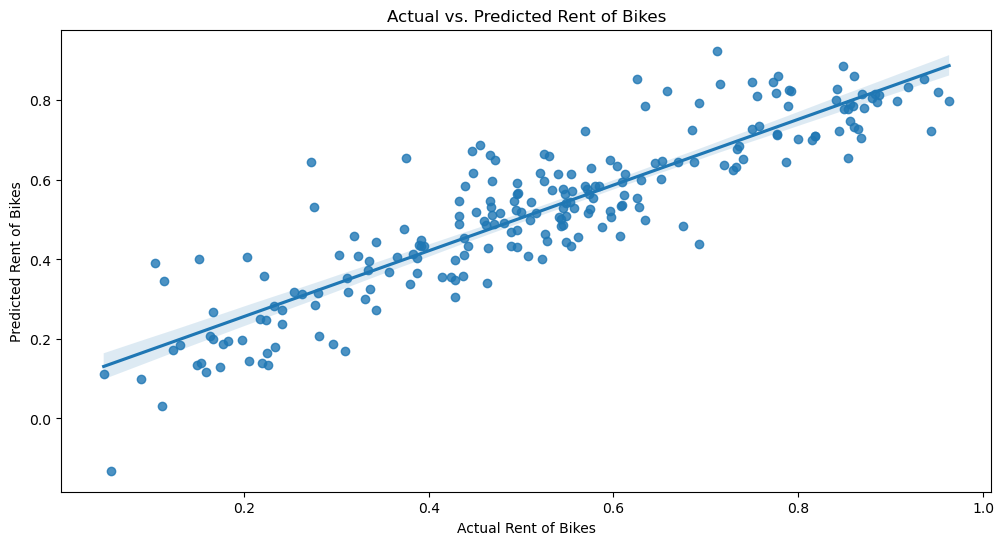

In [69]:
##lets visualize predictions on the test set
plt.figure(figsize = (12,6))
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes')
plt.xlabel('Actual Rent of Bikes')
plt.ylabel('Predicted Rent of Bikes')
plt.show()